# Level- 2, Task-1 Table Booking and Online Delivery

In [73]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('Dataset .csv')

In [3]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [8]:
# Calculate the percentage of restaurants that offer table booking
table_booking_percentage = (df['Has Table booking'].value_counts(normalize=True) * 100).get('Yes', 0)

# Calculate the percentage of restaurants that offer online delivery
online_delivery_percentage = (df['Has Online delivery'].value_counts(normalize=True) * 100).get('Yes', 0)

print("Percentage of Restaurants that Offer Table Booking: {:.2f}%".format(table_booking_percentage))
print("Percentage of Restaurants that Offer Online Delivery: {:.2f}%".format(online_delivery_percentage))


Percentage of Restaurants that Offer Table Booking: 12.12%
Percentage of Restaurants that Offer Online Delivery: 25.66%


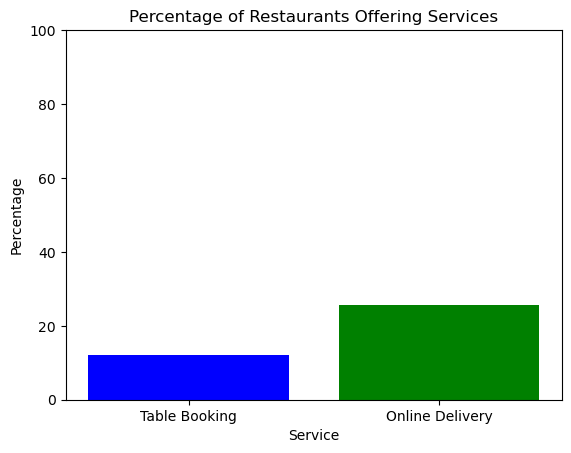

In [9]:
services = ['Table Booking', 'Online Delivery']
percentages = [table_booking_percentage, online_delivery_percentage]

plt.bar(services, percentages, color=['blue', 'green'])
plt.xlabel('Service')
plt.ylabel('Percentage')
plt.title('Percentage of Restaurants Offering Services')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.show()

In [12]:
# Group the data based on the presence or absence of table booking
grouped_df = df.groupby('Has Table booking')

# Calculate the average rating for each group
average_ratings = grouped_df['Aggregate rating'].mean()

print("Average Ratings:")
print(average_ratings)

Average Ratings:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


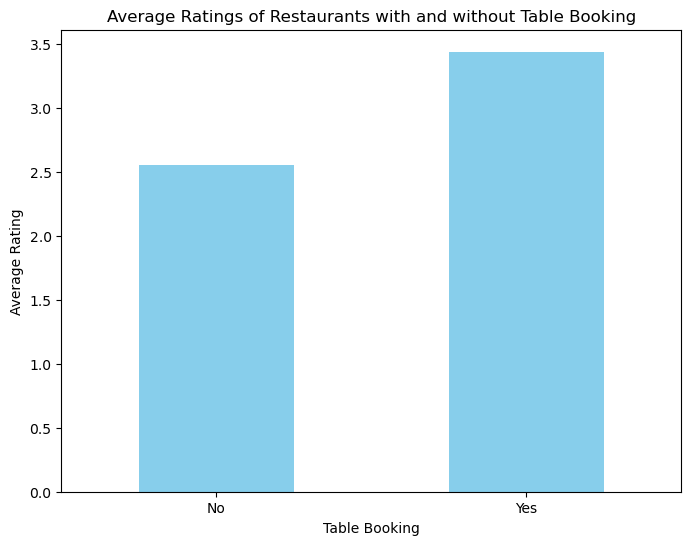

In [13]:
plt.figure(figsize=(8, 6))
average_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings of Restaurants with and without Table Booking')
plt.xlabel('Table Booking')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

In [16]:
# Group the data by price range and calculate the percentage of restaurants offering online delivery within each group
online_delivery_percentage_by_price = df.groupby('Price range')['Has Online delivery'].apply(lambda x: (x == 'Yes').mean() * 100)

print("Percentage of Restaurants Offering Online Delivery by Price Range:")
print(online_delivery_percentage_by_price)


Percentage of Restaurants Offering Online Delivery by Price Range:
Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has Online delivery, dtype: float64


In [34]:
# Group Restaurants by Price Range and Calculate Percentage of Restaurants with Online Delivery
price_ranges = df['Price range'].unique()
online_delivery_percentages = []

for price_range in price_ranges:
    # Filter restaurants by price range
    subset = df[df['Price range'] == price_range]
    
    # Calculate the percentage of restaurants with online delivery in this price range
    online_delivery_percentage = (subset['Is delivering now'].value_counts(normalize=True) * 100).get('Yes', 0)
    online_delivery_percentages.append(online_delivery_percentage)


In [35]:
print( online_delivery_percentages)

[0.4261363636363636, 0, 0.6745904272406039, 0.15751575157515751]


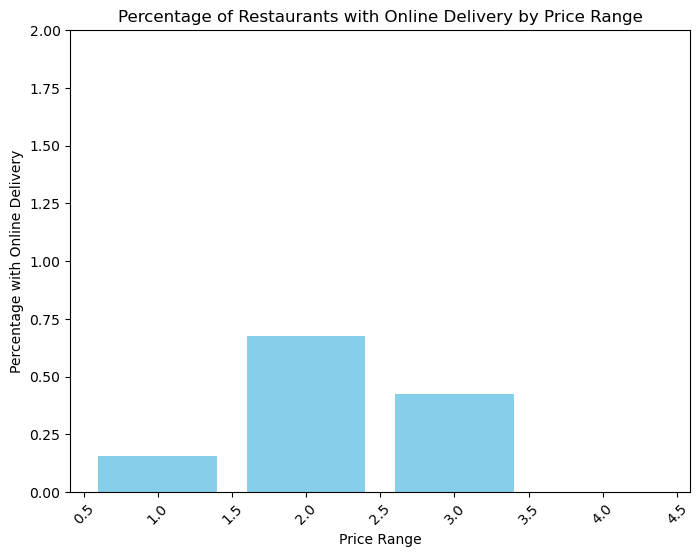

In [41]:
plt.figure(figsize=(8, 6))
plt.bar(price_ranges, online_delivery_percentages, color='skyblue')
plt.title('Percentage of Restaurants with Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage with Online Delivery')
plt.xticks(rotation=45)
plt.ylim(0, 2)
plt.show()

# Level- 2, Task-2 Price Range Analysis

In [42]:
# Determine the most common price range among all the restaurants
most_common_price_range = df['Price range'].value_counts().idxmax()

print("The most common price range among all the restaurants is:", most_common_price_range)


The most common price range among all the restaurants is: 1


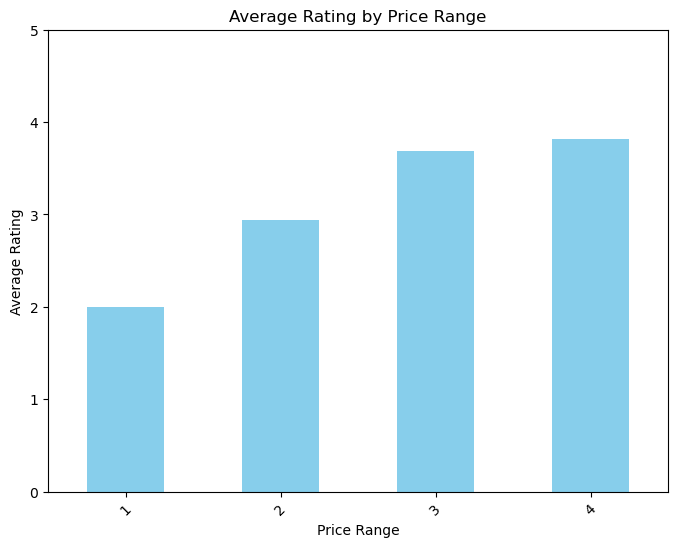

In [43]:
# Group the restaurants by price range and calculate the average rating for each price range
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

# Plot the average rating for each price range
plt.figure(figsize=(8, 6))
average_rating_by_price_range.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Assuming ratings are on a scale of 0 to 5
plt.show()



In [44]:
# Identify the color representing the highest average rating
highest_average_rating_color = 'skyblue'  # Default color
highest_average_rating = average_rating_by_price_range.max()
for price_range, avg_rating in average_rating_by_price_range.items():
    if avg_rating == highest_average_rating:
        highest_average_rating_color = plt.cm.get_cmap('tab10')(price_range / len(average_rating_by_price_range))

print("The color representing the highest average rating among different price ranges is:", highest_average_rating_color)


The color representing the highest average rating among different price ranges is: (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)


C:\Users\ragha\AppData\Local\Temp\ipykernel_21236\1786040983.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  highest_average_rating_color = plt.cm.get_cmap('tab10')(price_range / len(average_rating_by_price_range))


In [45]:
# Group the restaurants by price range and calculate the average rating for each group
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

print("Average Rating for Each Price Range:")
print(average_rating_by_price_range)


Average Rating for Each Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [53]:
# Calculate the average rating for each price range
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

# Identify the highest average rating
highest_average_rating = average_rating_by_price_range.max()

# Find the price range with the highest average rating
price_range_with_highest_rating = average_rating_by_price_range[average_rating_by_price_range == highest_average_rating].index[0]

# Find the color associated with the highest average rating
highest_rating_color = df[df['Price range'] == price_range_with_highest_rating]['Rating color'].iloc[0]

print("The color that represents the highest average rating among different price ranges is:", highest_rating_color)


The color that represents the highest average rating among different price ranges is: Green


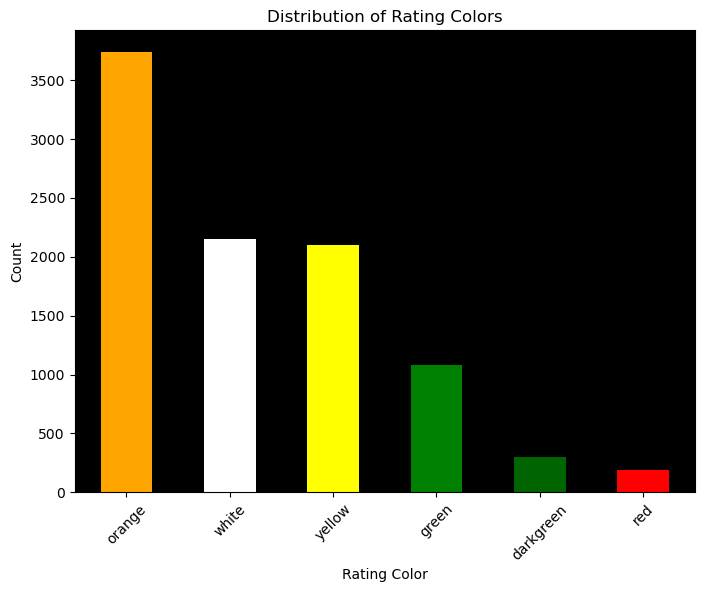

In [63]:

# Define a mapping from Rating color to Matplotlib-compatible colors
color_mapping = {
    'Dark Green': 'darkgreen',
    'Green': 'green',
    'Orange': 'orange',
    'Red': 'red',
    'White': 'white',
    'Yellow': 'yellow'
}

# Map the Rating color to Matplotlib-compatible colors
df['Matplotlib Color'] = df['Rating color'].map(color_mapping)

# Count the occurrences of each Matplotlib-compatible color
color_counts = df['Matplotlib Color'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
color_counts.plot(kind='bar', color=color_counts.index)
plt.title('Distribution of Rating Colors')
plt.xlabel('Rating Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Level- 2, Task-2 Feature Engineering


In [65]:
# Extracting the length of the restaurant name
df['Restaurant Name Length'] = df['Restaurant Name'].str.len()

# Extracting the length of the address
df['Address Length'] = df['Address'].str.len()

# Display the DataFrame with the new features
print(df.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

# Level-2, Task-3 Feature Engineering

In [72]:

# Example DataFrame
data = {
    'City': ['Makati City', 'Makati City', 'Mandaluyong City'],
    'Restaurant Name': ['Restaurant A', 'Restaurant B', 'Restaurant C'],
    'Address': ['123 Main St', '456 Elm St', '789 Oak St']
}
df = pd.DataFrame(data)

# Extracting additional features
df['Restaurant Name Length'] = df['Restaurant Name'].str.len()
df['Address Length'] = df['Address'].str.len()

# Display the DataFrame with the new features
print(df)


               City Restaurant Name      Address  Restaurant Name Length  \
0       Makati City    Restaurant A  123 Main St                      12   
1       Makati City    Restaurant B   456 Elm St                      12   
2  Mandaluyong City    Restaurant C   789 Oak St                      12   

   Address Length  
0              11  
1              10  
2              10  


In [74]:
# Example DataFrame
data = {
    'City': ['Makati City', 'Makati City', 'Mandaluyong City'],
    'Has Table Booking': ['Yes', 'No', 'Yes'],
    'Has Online Delivery': ['No', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
df['Has Table Booking Encoded'] = label_encoder.fit_transform(df['Has Table Booking'])
df['Has Online Delivery Encoded'] = label_encoder.fit_transform(df['Has Online Delivery'])

# Display the DataFrame with the new features
print(df)


               City Has Table Booking Has Online Delivery  \
0       Makati City               Yes                  No   
1       Makati City                No                 Yes   
2  Mandaluyong City               Yes                  No   

   Has Table Booking Encoded  Has Online Delivery Encoded  
0                          1                            0  
1                          0                            1  
2                          1                            0  


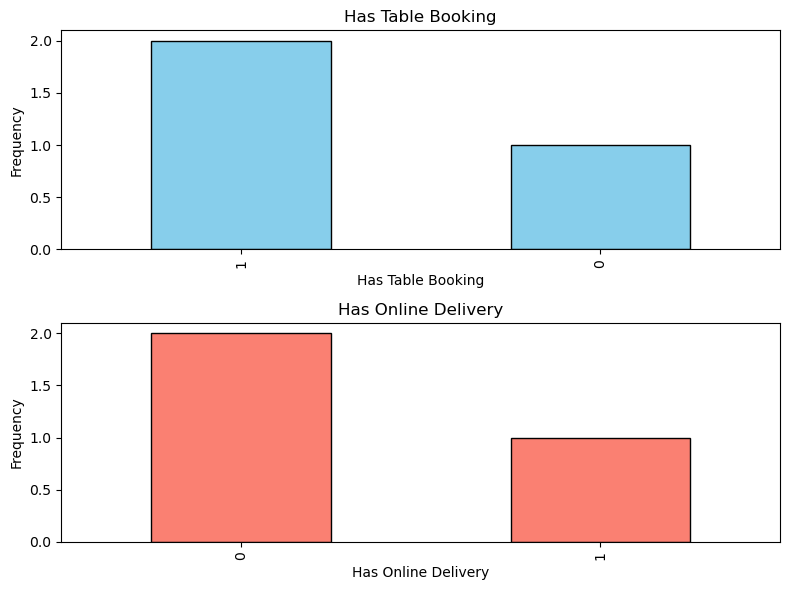

In [76]:

# Example DataFrame
data = {
    'City': ['Makati City', 'Makati City', 'Mandaluyong City'],
    'Has Table Booking': ['Yes', 'No', 'Yes'],
    'Has Online Delivery': ['No', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Has Table Booking', 'Has Online Delivery'])

# Plotting
plt.figure(figsize=(8, 6))

# Plotting "Has Table Booking"
plt.subplot(2, 1, 1)
df['Has Table Booking_Yes'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Has Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Frequency')

# Plotting "Has Online Delivery"
plt.subplot(2, 1, 2)
df['Has Online Delivery_Yes'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Has Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
